<a href="https://colab.research.google.com/github/thisispriyanshugupta/AI_Powered_Music_Visualizer/blob/main/AI_Powered_Music_Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install librosa matplotlib


Load and Analyze Audio
> Add blockquote



In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

def extract_audio_features(audio_path):
    y, sr = librosa.load(audio_path)
    tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)

    return y, sr, tempo, beat_frames, spectral_centroid

audio_path = librosa.example('trumpet')
y, sr, tempo, beat_frames, spectral_centroid = extract_audio_features(audio_path)

print(f'Tempo: {tempo}')
print(f'Beat frames: {beat_frames}')
print(f'Spectral centroid shape: {spectral_centroid.shape}')


Tempo: [184.5703125]
Beat frames: [ 18  33  48  61  74  88 102]
Spectral centroid shape: (1, 230)


Real-Time Visualization
-Generate Visual Patterns:

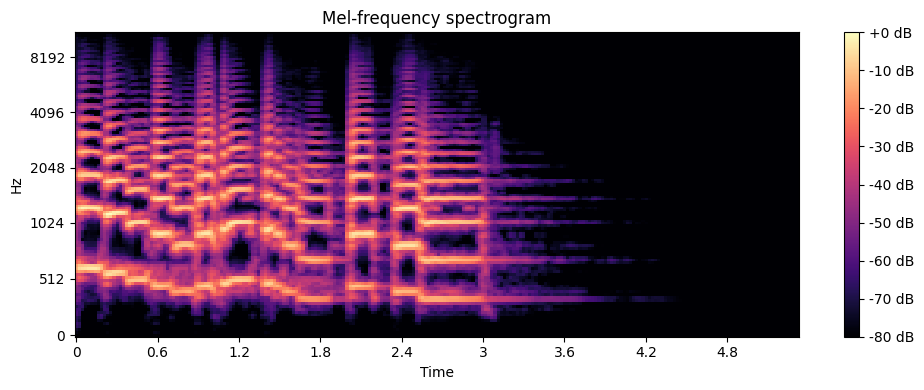

In [ ]:
def plot_spectrogram(y, sr):
    plt.figure(figsize=(10, 4))
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    S_dB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-frequency spectrogram')
    plt.tight_layout()
    plt.show()

plot_spectrogram(y, sr)


Interactive Visualization
Real-Time Beat Detection Visualization:
Visualize beats in real-time using a simple animation.

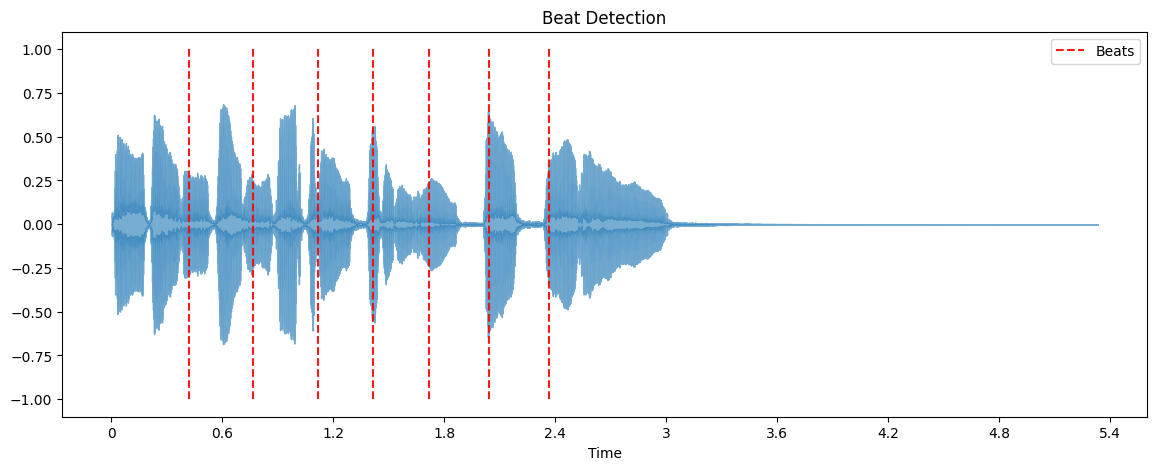

In [ ]:
import time
import IPython.display as ipd

def visualize_beats(y, sr, beat_frames):
    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(y, sr=sr, alpha=0.6)
    plt.vlines(librosa.frames_to_time(beat_frames, sr=sr), -1, 1, color='r', alpha=0.9, linestyle='--', label='Beats')
    plt.legend(loc='upper right')
    plt.title('Beat Detection')
    plt.show()

# Visualize the beats
visualize_beats(y, sr, beat_frames)


More Advanced Visualization (Using Plotly for Interactivity)


In [ ]:
!pip install plotly


Create an Interactive Visualization:
Use Plotly to create interactive visualizations that respond to music features.

In [ ]:
import plotly.graph_objects as go

def plot_interactive_spectrogram(y, sr):
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    S_dB = librosa.power_to_db(S, ref=np.max)

    fig = go.Figure(data=go.Heatmap(
        z=S_dB,
        x=np.linspace(0, len(y)/sr, S_dB.shape[1]),
        y=np.linspace(0, sr/2, S_dB.shape[0]),
        colorscale='Viridis'
    ))
    fig.update_layout(
        title='Mel-frequency spectrogram',
        xaxis_title='Time (s)',
        yaxis_title='Frequency (Hz)'
    )
    fig.show()

plot_interactive_spectrogram(y, sr)


**Real-Time Visual Art with Matplotlib Animation**




Here's an example where we use matplotlib to create a real-time, abstract visualization that updates based on the beat detection and spectral centroid features extracted from the audio:

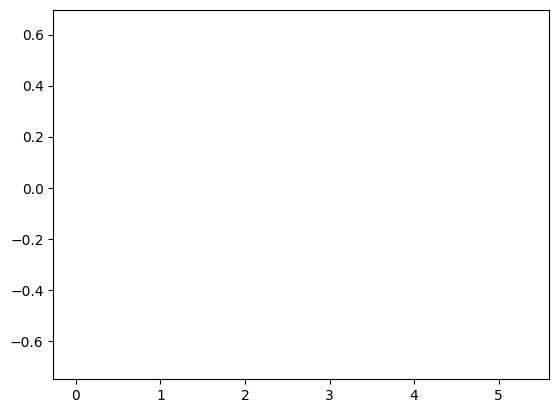

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Function to extract audio features
def extract_audio_features(audio_path):
    y, sr = librosa.load(audio_path)
    tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    return y, sr, tempo, beat_frames, spectral_centroid

audio_path = librosa.example('trumpet')
y, sr, tempo, beat_frames, spectral_centroid = extract_audio_features(audio_path)

# Initialize the plot
fig, ax = plt.subplots()
x = np.linspace(0, len(y)/sr, len(y))
line, = ax.plot(x, y, lw=2)

# Set up the animation function
def init():
    line.set_ydata([np.nan] * len(y))
    return line,

def update(frame):
    line.set_ydata(y * np.sin(2 * np.pi * spectral_centroid[0, frame]))
    ax.set_title(f'Frame: {frame} | Tempo: {tempo:.2f}')
    return line,

ani = animation.FuncAnimation(fig, update, frames=len(spectral_centroid[0]), init_func=init, blit=True, interval=50)
plt.show()


**Real-Time Interactive Visual Art with Plotly**

For more interactive and visually appealing real-time visual art, we can use Plotly to create a dynamic visualization. Here’s an example:

In [ ]:
!pip install plotly

import plotly.graph_objects as go
import numpy as np
import librosa

# Function to extract audio features
def extract_audio_features(audio_path):
    y, sr = librosa.load(audio_path)
    tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    return y, sr, tempo, beat_frames, spectral_centroid

audio_path = librosa.example('trumpet')
y, sr, tempo, beat_frames, spectral_centroid = extract_audio_features(audio_path)

# Set up interactive plot
time = np.linspace(0, len(y)/sr, len(y))

fig = go.Figure()

# Add initial wave plot
fig.add_trace(go.Scatter(x=time, y=y, mode='lines', name='Waveform'))

# Add beat markers
beat_times = librosa.frames_to_time(beat_frames, sr=sr)
fig.add_trace(go.Scatter(x=beat_times, y=[0]*len(beat_times), mode='markers', name='Beats', marker=dict(color='red', size=10)))

# Add spectral centroid line
centroid_times = np.linspace(0, len(y)/sr, num=spectral_centroid.shape[1])
fig.add_trace(go.Scatter(x=centroid_times, y=spectral_centroid[0], mode='lines', name='Spectral Centroid', line=dict(color='green', width=2)))

# Update function to create dynamic visual art
frames = [go.Frame(data=[go.Scatter(x=time, y=y * np.sin(2 * np.pi * spectral_centroid[0, i]), mode='lines', line=dict(color='royalblue'))],
                   name=str(i)) for i in range(len(spectral_centroid[0]))]

fig.frames = frames

# Add slider
sliders = [dict(
    steps=[dict(method='animate', args=[[str(i)], dict(mode='immediate', frame=dict(duration=50, redraw=True), transition=dict(duration=0))], label=str(i)) for i in range(len(spectral_centroid[0]))],
    transition=dict(duration=0),
    x=0,
    y=0,
    currentvalue=dict(font=dict(size=12), prefix='Frame: ', visible=True, xanchor='center')
)]

fig.update_layout(updatemenus=[dict(type='buttons', showactive=False, buttons=[dict(label='Play', method='animate', args=[None, dict(frame=dict(duration=50, redraw=True), fromcurrent=True, mode='immediate')])])], sliders=sliders)

fig.show()
